<a href="https://colab.research.google.com/github/lenim2/ex_stress/blob/main/Practica_Human_Stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRACTICA 1. MACHINE LEARNING
### “Humedad – Temperatura – Recuento de pasos – Niveles de estrés” 

<img src="https://www.neuraldojo.org/media/stres2.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>


##**Nombre del alumno:**


En base a la actividad física del ser humano, aquí se detectan y analizan los niveles de estrés del ser humano. Se proporciona un conjunto de datos de 2001 muestras para la humedad del cuerpo humano, la temperatura corporal y la cantidad de pasos dados por el usuario. Se realizan tres clasificaciones diferentes de estrés, estrés bajo, estrés normal y estrés alto. 


Construir un modelo para predecir el tipo de estress de una persona, para esto debe:
- Seguir todos los pasos de un proceso ML:
    - Identificación del Problema
    - Importación de datos
    - EDA
    - Modelado
    - Evaluación y Selección del Modelo


Criteros de Evaluación:

- Todo el código del proyecto esté contenido en un cuaderno o script de Jupyter o Google Colab. 

- Demuestre una ejecución y salida exitosas del código, sin errores.

- Escriba código que esté bien documentado y use funciones y clases según sea necesario.

- Genere visualizaciones para comprender mejor los datos

- Que incluya metodos de exploración de datos

- Pruebe con al menos dos algoritmos ML y juege con sus parametros.

- Seleccione el mejor modelo e imprima su scores.

- Conclusiones


Dataset: https://www.neuraldojo.org/media/humanstress/dataset.zip

Método de Entrega del trabajo:

Alternativas
- Subir el enlace a plataforma Capacita Global
- Enviar el enlace de colab a mi correo: necrus.aikon@gmail.com, Asunto: Human Stress ML
- Enviar el archivo en formato *.ipynb a mi correo: necrus.aikon@gmail.com Asunto: Human Stress ML


Fecha de Entrega: 17/03/2022


# Sección nueva

PRACTICA 2

1. Importacion de las librerias

# 1.- Importacion de las librerias

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sms 
import pandas as pd
from sklearn.model_selection import train_test_split


In [21]:
stress =pd.read_csv('Stress-Lysis.csv' , sep=',')

# 2.- Preparacion y analisis de los datos(EDA)


# 2.1 Inpeccion de los datos

In [22]:
stress.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123.0,1
1,21.41,90.41,93.0,1
2,27.12,96.12,196.0,2
3,27.64,96.64,177.0,2
4,NaN,79.87,87.0,0


# 2.2 Verificacion de los valores 

In [23]:
# Revisando los valores del dataframe
stress.describe

<bound method NDFrame.describe of       Humidity  Temperature  Step count  Stress Level
0        21.33        90.33       123.0             1
1        21.41        90.41        93.0             1
2        27.12        96.12       196.0             2
3        27.64        96.64       177.0             2
4          NaN        79.87        87.0             0
...        ...          ...         ...           ...
1996     21.82        90.82        96.0             1
1997     10.45        79.45        45.0             0
1998     27.22        96.22       135.0             2
1999     12.46        81.46        64.0             0
2000     16.87        85.87        50.0             1

[2001 rows x 4 columns]>

In [24]:
stress.describe().T

,count,mean,std,min,25%,50%,75%,max
Humidity,1990.0,20.001829,5.785047,10.0,14.9825,19.995,25.0175,30.0
Temperature,1977.0,89.012215,5.793937,79.0,83.9700,89.010,94.0500,99.0
Step count,1984.0,166.525202,2439.424048,0.0,49.7500,101.000,151.0000,107150.0
Stress Level,2001.0,1.104448,0.771094,0.0,0.0000,1.000,2.0000,2.0


In [25]:
#Reemplazamos los valores NaN a 0 del dataframe
stress=stress.fillna(0)
print('\n=== Nuevo DataFrame ===\n', stress)



=== Nuevo DataFrame ===
       Humidity  Temperature  Step count  Stress Level
0        21.33        90.33       123.0             1
1        21.41        90.41        93.0             1
2        27.12        96.12       196.0             2
3        27.64        96.64       177.0             2
4         0.00        79.87        87.0             0
...        ...          ...         ...           ...
1996     21.82        90.82        96.0             1
1997     10.45        79.45        45.0             0
1998     27.22        96.22       135.0             2
1999     12.46        81.46        64.0             0
2000     16.87        85.87        50.0             1

[2001 rows x 4 columns]


In [26]:
#Cantidad filas y columnas que contiene el dataframe
stress.shape

(2001, 4)

In [27]:
#Informacion de los tipos de variables 
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   float64
 3   Stress Level  2001 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.7 KB


In [28]:
# Verificar cuantas clases tiene el dataframe
stress['Stress Level'].unique()

array([1, 2, 0])

In [29]:
#Verificamos si hay valores nulos
stress.isnull().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

In [ ]:
#Cantidad de columnas en el dataframe
stress.columns

Index(['Humidity', 'Temperature', 'Step count', 'Stress Level'], dtype='object')

In [30]:
#Muestra los valores estadisticamente
stress.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,19.891874,87.944603,165.110445,1.104448
std,5.955754,11.274068,2429.082477,0.771094
min,0.000000,0.000000,0.000000,0.000000
25%,14.900000,83.790000,48.000000,0.000000
50%,19.940000,88.890000,101.000000,1.000000
75%,24.990000,93.990000,150.000000,2.000000
max,30.000000,99.000000,107150.000000,2.000000


# 2.3 Distribucion y correlacion

In [31]:
stress['Stress Level'].value_counts()

1    790
2    710
0    501
Name: Stress Level, dtype: int64

In [32]:
dist=stress['Stress Level'].value_counts()

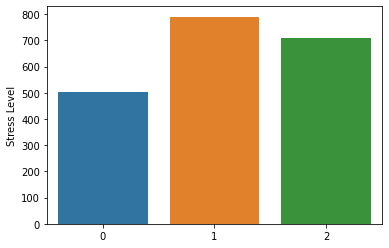

In [33]:
sms.barplot(x=dist.index, y=dist)

# 2.4 Inspeccion de cada una de las columnas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


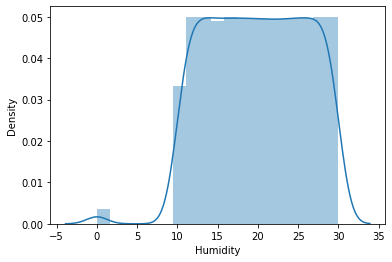

In [34]:
# Inspeccion de las columnas 
sms.distplot(stress['Humidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


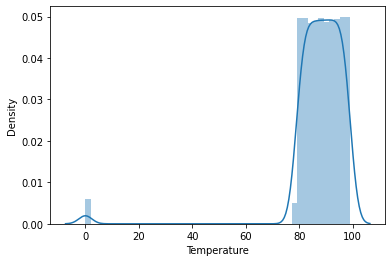

In [35]:
sms.distplot(stress['Temperature'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


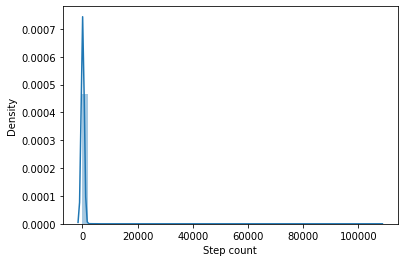

In [36]:
sms.distplot(stress['Step count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


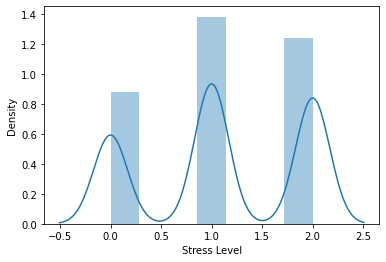

In [37]:
sms.distplot(stress['Stress Level'])

In [40]:
targets=stress['Stress Level'].value_counts()


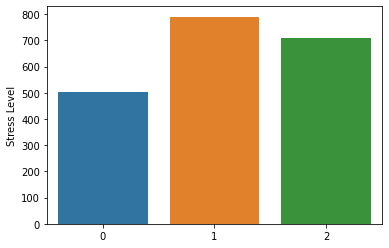

In [42]:
#Analizando la comuna de interes
sms.barplot(x=targets.index, y=targets)


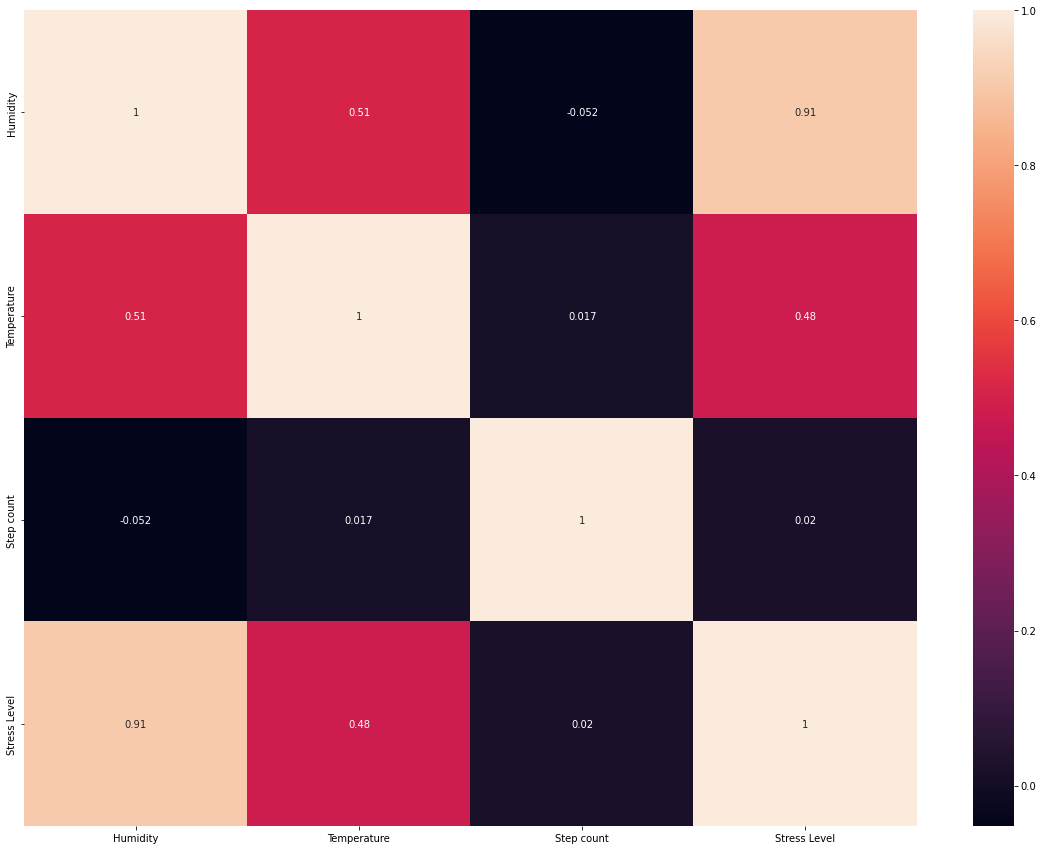

In [55]:
# Verificacion de la correlacion de los valores
plt.figure(figsize=(20,15))
sms.heatmap(stress.corr(), annot=True)

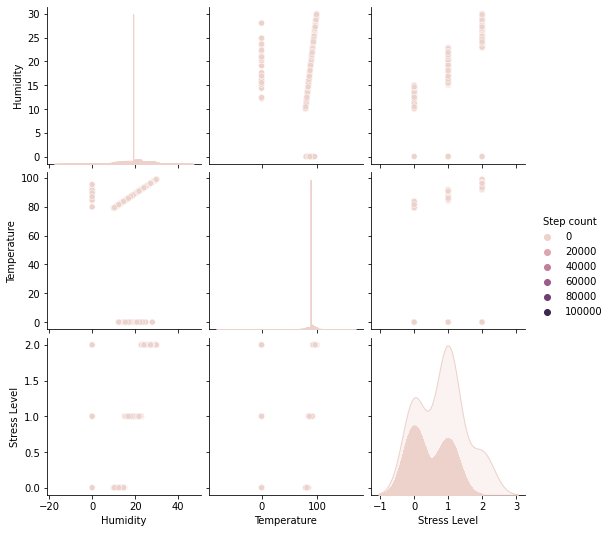

In [44]:
sms.pairplot(data = stress, hue= 'Step count')

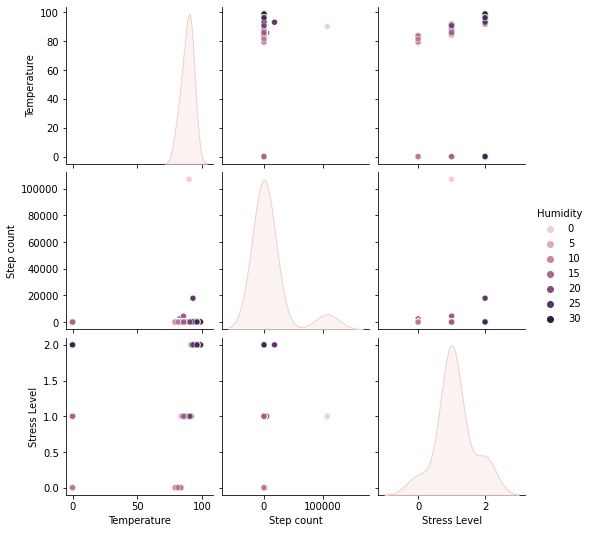

In [45]:
sms.pairplot(data =stress, hue='Humidity')

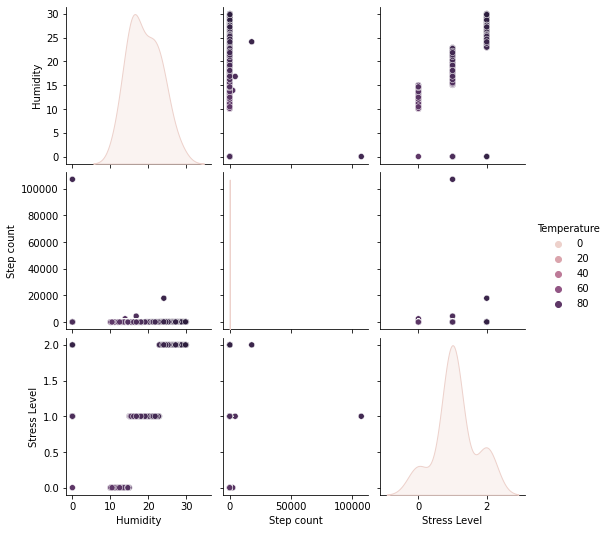

In [46]:
sms.pairplot(data=stress,hue='Temperature')

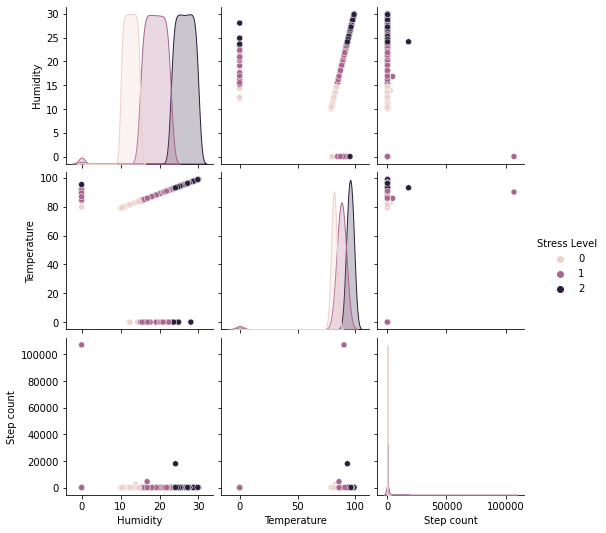

In [47]:
sms.pairplot(data=stress,hue='Stress Level')

In [48]:
stress['Stress Level'].value_counts()

1    790
2    710
0    501
Name: Stress Level, dtype: int64

In [49]:
 stress_cat =pd.get_dummies(stress)

In [50]:
stress_cat

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123.0,1
1,21.41,90.41,93.0,1
2,27.12,96.12,196.0,2
3,27.64,96.64,177.0,2
4,0.00,79.87,87.0,0
...,...,...,...,...
1996,21.82,90.82,96.0,1
1997,10.45,79.45,45.0,0
1998,27.22,96.22,135.0,2
1999,12.46,81.46,64.0,0


In [51]:
#Dividimos nuestros datos para entrenar el modelo(Train, Validation)
stress_train = stress_cat.sample(frac= .80)
stress_test =stress_cat.drop(stress_train.index)

In [52]:
#dividimos nuestros datos train, validation an test
x = stress_train.drop('Stress Level', axis=1)
y = stress_train['Stress Level']

x_test=stress_test.drop('Stress Level', axis=1)
y_test=stress_test['Stress Level']

x_train,x_valid,y_train,y_valid=train_test_split(x,y,random_state=0,test_size=0.3)

# 3.- Preparando el modelo

In [54]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

# 4.- Evaluacion del Modelo